# Exercise 5.11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
import itertools
from tqdm import tqdm
np.random.seed(0)

In [2]:
# o: out of track, x: in track, s: start, f: finish
racetrack_1 = np.char.array([
 ['o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'f'],
 ['o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'f'],
 ['o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'f'],
 ['o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'f'],
 ['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'f'],
 ['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'f'],
 ['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'o', 's', 's', 's', 's', 's', 's', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
])

racetrack_2 = np.char.array([
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'f'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'f'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'f'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'f'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'f'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'f'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'f'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'f'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'f'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
 ['s', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'],
])


In [3]:
class RacetrackMDP():
	
	def __init__(self, map, noise, min_acc, max_acc, min_vel, max_vel):
		self.map = map
		self.noise = noise	
		self.min_acc = min_acc
		self.max_acc = max_acc
		self.min_vel = min_vel
		self.max_vel = max_vel

		
	def getPossibleActions(self, state):
		(x_loc, y_loc), (x_vel, y_vel) = state 
		actions = []
		for x in range(self.min_acc, self.max_acc + 1):
			for y in range(self.min_acc, self.max_acc + 1):
				if (x_vel + x, y_vel + y) != (0,0) and self.min_vel <= x_vel + x  and x_vel + x <= self.max_vel and self.min_vel <= y_vel + y and y_vel + y <= self.max_vel:
					actions.append((x,y))
		return actions


	def getNonTerminalStates(self):
		indices = np.where((self.map == 'x') | (self.map == 's')) 
		possible_speeds = [(i,j) for i in range(self.min_vel, self.max_vel + 1) for j in range(self.min_vel, self.max_vel + 1) if (i,j) != (0,0)]
		return list(itertools.product(list(zip(indices[0], indices[1])), possible_speeds)) + self.getStartingStates()
	
	def getTerminalStates(self):
		indices = np.where(self.map == 'f')
		possible_speeds = [(i,j) for i in range(self.min_vel, self.max_vel + 1) for j in range(self.min_vel, self.max_vel + 1) if (i,j) != (0,0)]
		return list(itertools.product(list(zip(indices[0], indices[1])), possible_speeds))
	
	def getStartingStates(self):
		indices = np.where(self.map == 's')
		possible_speeds = [(0,0)]
		return list(itertools.product(list(zip(indices[0], indices[1])), possible_speeds))
	

	def path_intersect(self, old_position, new_position):
		# Bresenham's Line Algorithm
		# Can return 'reset', 'finish', or 'OK'
		x0, y0 = old_position
		x1, y1 = new_position
		dx = abs(x1 - x0)
		dy = abs(y1 - y0)
		x, y = x0, y0
		sx = 1 if x0 < x1 else -1
		sy = 1 if y0 < y1 else -1

		if dx > dy:
			err = dx / 2.0
			while x != x1:
				if self.map.shape[0] <= x or self.map.shape[1] <= y or x < 0 or y < 0:
					return 'reset', (x,y)
				if self.map[x,y] == 'o':
					return 'reset', (x,y)
				if self.map[x,y] == 'f':
					return 'finish', (x,y)
				err -= dy
				if err < 0:
					y += sy
					err += dx
				x += sx
		else:
			err = dy / 2.0
			while y != y1:
				if self.map.shape[0] <= x or self.map.shape[1] <= y or x < 0 or y < 0:
					return 'reset', (x,y)
				if self.map[x,y] == 'o':
					return 'reset', (x,y)
				if self.map[x,y] == 'f':
					return 'finish', (x,y)
				err -= dx
				if err < 0:
					x += sx
					err += dy
				y += sy
		if self.map.shape[0] <= x or self.map.shape[1] <= y or x < 0 or y < 0:
			return 'reset', (x,y)
		if self.map[x,y] == 'o':
			return 'reset', (x,y)
		if self.map[x,y] == 'f':
			return 'finish', (x,y)
		return 'ok', (x,y)



	def transition(self, state, action, rand = True):
		# Returns: next_state, reward, terminal
		(x_loc, y_loc), (x_vel, y_vel) = state
		x_acc, y_acc = action

		if np.random.rand() > self.noise or not rand:
			x_vel = x_vel + x_acc
			y_vel = y_vel + y_acc
		
		target_x_loc = x_loc - x_vel	# The x axis is flipped in the map
		target_y_loc = y_loc + y_vel	

		# The intersection/new position 
		path_res, loc = self.path_intersect((x_loc, y_loc), (target_x_loc, target_y_loc))
		if path_res == 'reset':
			indices = np.where((self.map == 's'))
			x_loc, y_loc = random.choice(list(zip(indices[0], indices[1])))
			return ((x_loc, y_loc), (0, 0)), -1, False
		if path_res == 'finish':
			return (loc, (0, 0)), 0, True
		return ((target_x_loc, target_y_loc), (x_vel, y_vel)), -1, False
		

In [4]:
class Policy():
	def __init__(self, mdp, epsilon):
		self.mdp = mdp
		self.epsilon = epsilon
		
		self.policies = {}
		for s in self.mdp.getNonTerminalStates():
			self.policies[s] =  random.choice(self.mdp.getPossibleActions(s))
	
	def getPolicy(self, state, rand = True):
		if np.random.rand() < self.epsilon and rand:
			return random.choice(self.mdp.getPossibleActions(state))
		return self.policies[state]
	
	

In [5]:
class MonteCarlo():
	def __init__(self, mdp, policy, gamma):
		self.mdp = mdp
		self.policy = policy
		self.gamma = gamma

		self.Q = {}
		self.N = {}
		for s in self.mdp.getNonTerminalStates():
			for a in self.mdp.getPossibleActions(s):
				self.Q[(s,a)] = 0
				self.N[(s,a)] = 0

	def generateAndTrain(self):
		self.episode = []
		state_action_counts = Counter()

		state = random.choice(self.mdp.getStartingStates())

		terminal = False
		while not terminal:
			action = self.policy.getPolicy(state)
			next_state, reward, terminal = self.mdp.transition(state, action)
			self.episode.append((state, action, reward))
			state_action_counts[(state, action)] += 1

			state = next_state
			
		G = 0
		for (state, action, reward) in self.episode[::-1]:
			G = self.gamma * G + reward
			state_action_counts[(state, action)] -= 1
			if state_action_counts[(state, action)] == 0:
				self.N[(state, action)] += 1
				self.Q[(state, action)] += (G - self.Q[(state, action)]) / self.N[(state, action)]
				self.policy.policies[state] = max(self.mdp.getPossibleActions(state), key = lambda a: self.Q[(state, a)])
		
	def generate(self, state):
		episode = []
		terminal = False
		while not terminal:
			action = self.policy.getPolicy(state, rand = False)
			next_state, reward, terminal = self.mdp.transition(state, action, rand = False)
			episode.append((state, action, reward))
			state = next_state
		episode.append((state, action, reward))
		return episode
			

In [6]:
r1 = RacetrackMDP(racetrack_1, 0.1, -1, 1, 0, 5)
p1 = Policy(r1, 0.2)
mc1 = MonteCarlo(r1, p1, 0.9)

In [7]:
for i in tqdm(range(1000000)):
	mc1.generateAndTrain()

100%|██████████| 1000000/1000000 [06:48<00:00, 2448.09it/s]


In [8]:
def plot_trajectory(map, path):
	colors = np.zeros((map.shape[0], map.shape[1], 3))
	colors[map == 'f'] = [0, 1, 0]
	colors[map == 's'] = [1, 0, 0]
	colors[map == 'x'] = [1, 1, 1]
	colors[map == 'o'] = [0.5, 0.5, 0.5]

	fig, ax = plt.subplots()
	ax.imshow(colors, interpolation='nearest')
	ax.set_xticks(np.arange(-0.5, map.shape[1], 1), minor=True)
	ax.set_yticks(np.arange(-0.5, map.shape[0], 1), minor=True)
	ax.grid(which='minor', color='grey', linestyle='-', linewidth=0.5)

	for i in range(len(path) - 1):
		(x0, y0), _ = path[i]
		(x1, y1), _ = path[i+1]

		ax.arrow(y0, x0, y1 - y0, x1 - x0, width=0.05, head_width=0.3, head_length=0.3, color='blue')           # Length of the arrow along y

	#

	plt.show()

11


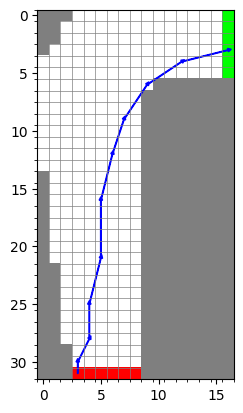

11


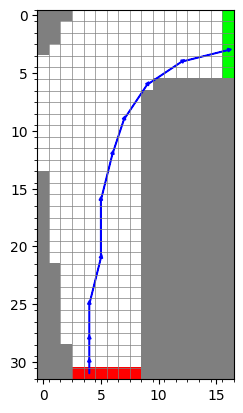

11


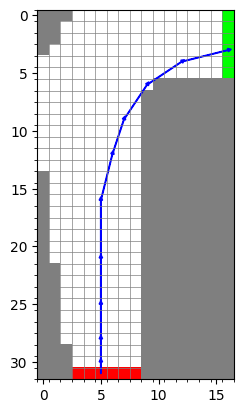

11


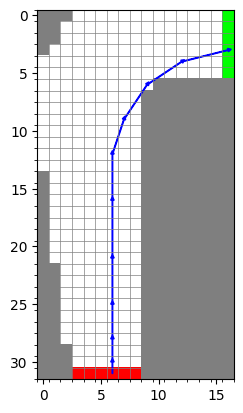

13


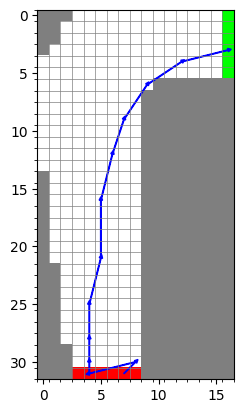

12


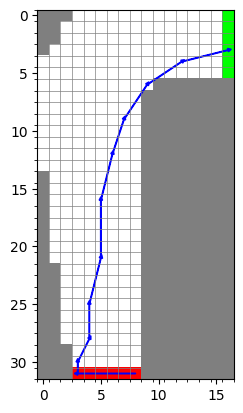

In [9]:
for start_state in r1.getStartingStates():
	episode = mc1.generate(start_state)
	print(len(episode))
	path = [e[0] for e in episode]
	plot_trajectory(racetrack_1, path)
	

In [11]:
r2 = RacetrackMDP(racetrack_2, 0.1, -1, 1, 0, 5)
p2 = Policy(r2, 0.2)
mc2 = MonteCarlo(r2, p2, 0.9)

In [12]:
for i in tqdm(range(1000000)):
	mc2.generateAndTrain()

100%|██████████| 1000000/1000000 [04:15<00:00, 3916.18it/s]


10


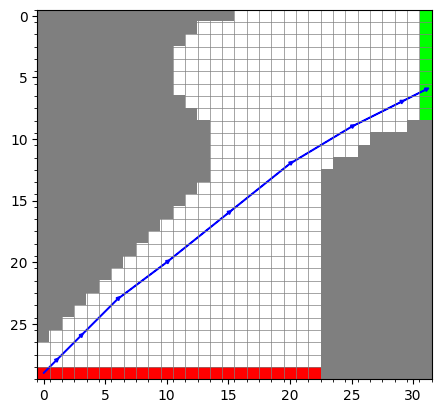

9


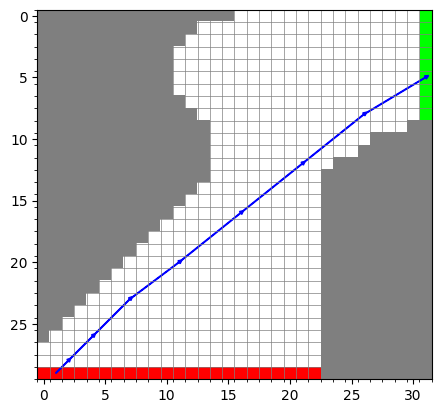

10


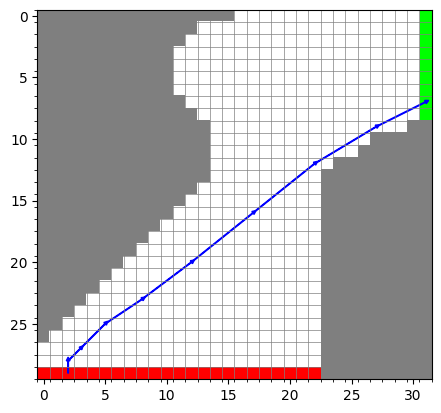

10


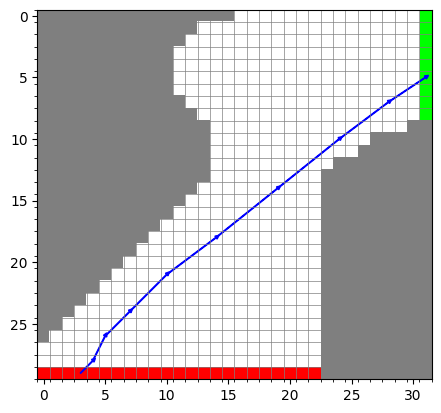

9


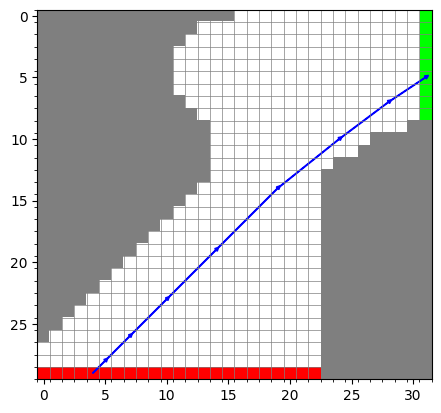

9


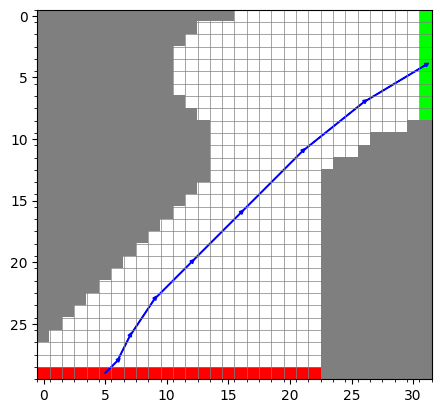

9


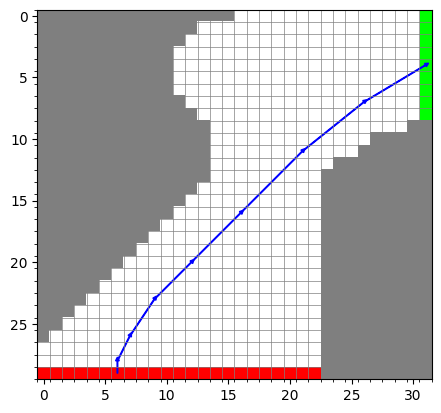

9


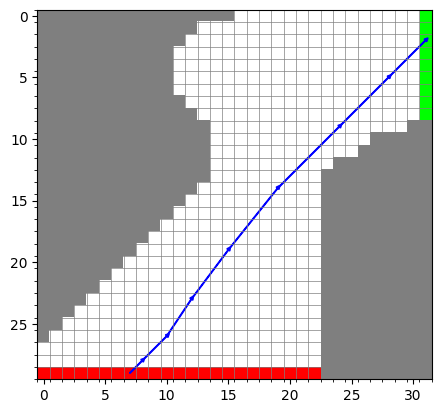

9


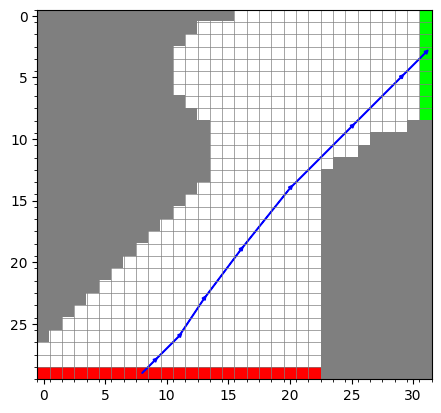

9


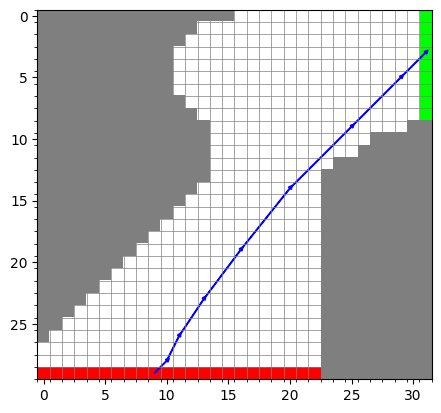

8


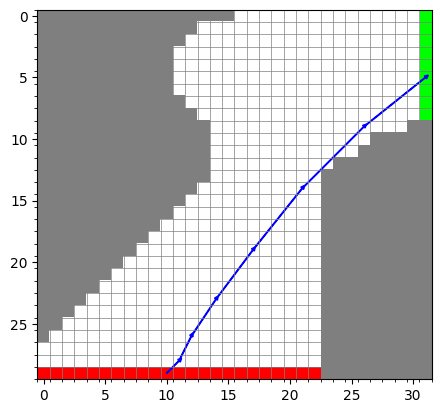

9


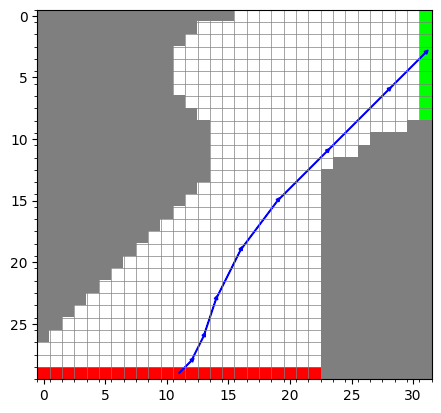

9


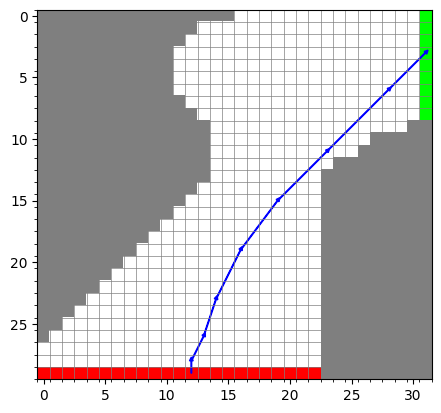

9


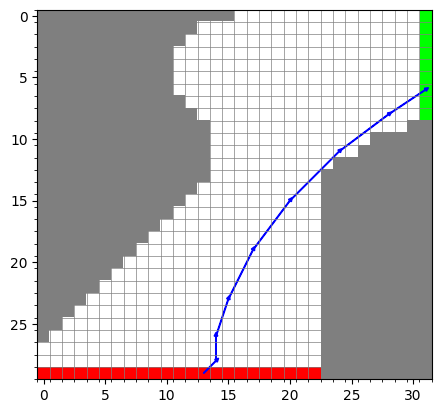

9


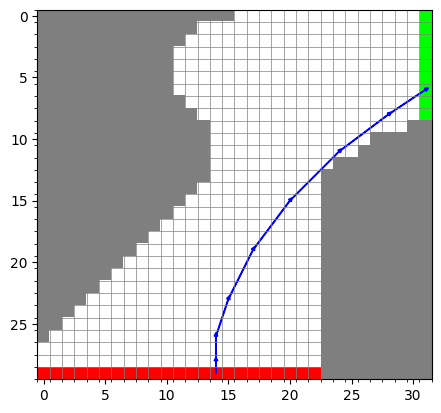

9


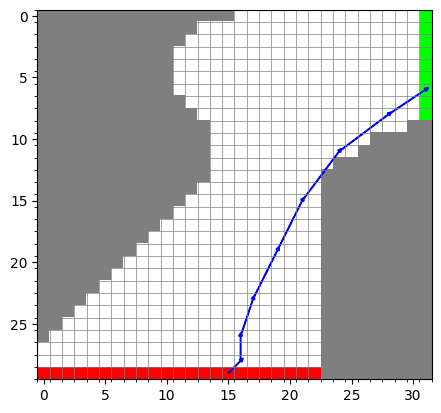

9


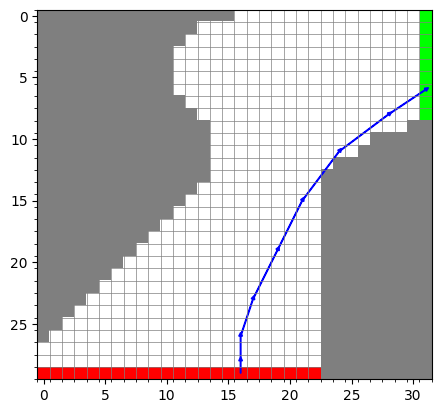

9


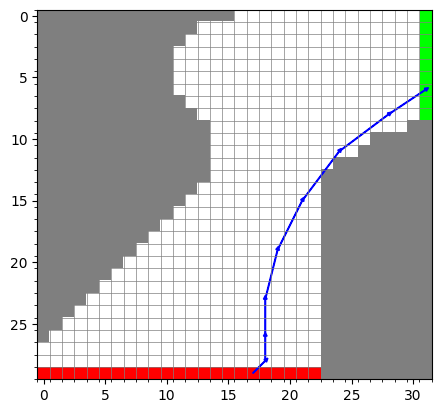

9


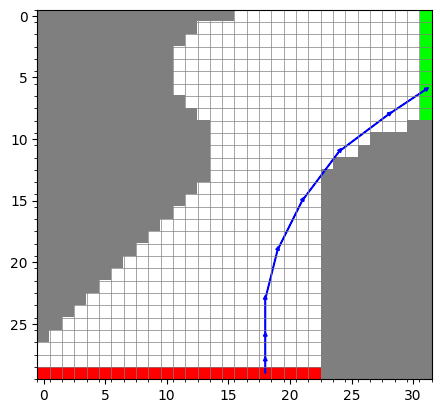

10


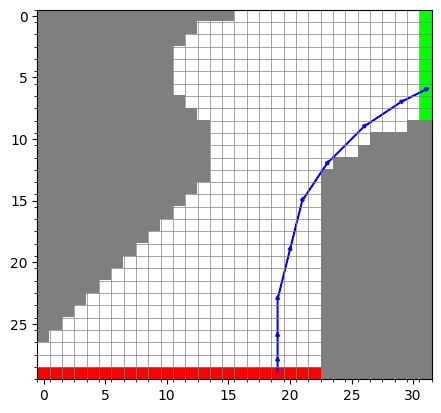

10


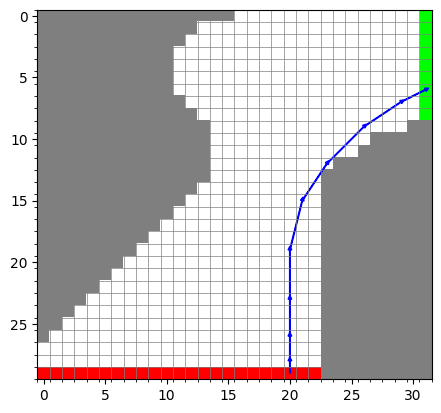

9


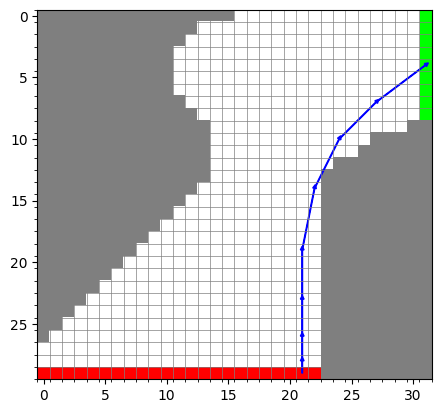

11


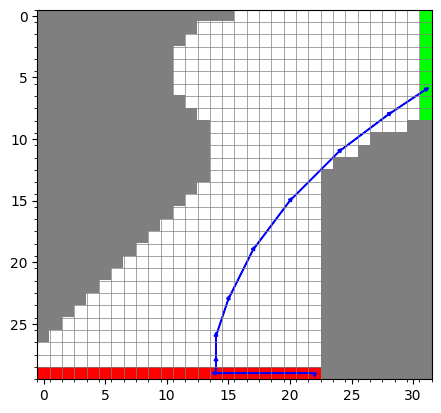

In [13]:
for start_state in r2.getStartingStates():
	episode = mc2.generate(start_state)
	print(len(episode))
	path = [e[0] for e in episode]
	plot_trajectory(racetrack_2, path)
	